<img src="https://www.wellcomeconnectingscience.org/wp-content/themes/new_wellcome_connecting_science/dist/assets/svg/logo.svg" alt="WCS Logo" width="150" style="float: left;">
<img src="https://github.com/EveliaCoss/Tutorial_ISCB_LATAM_scATACseq/blob/main/Logo_JAGUAR.png?raw=true" alt="WCS Logo" width="150" style="float: right;">





<h1><center>
  Practical 8: CITEseq based cell-type annotation
  </center>

## About the course 📌

This course is part of the Workshop [Single Cell Genomic Approaches to Study the Immune System - Latin America & the Caribbean](https://coursesandconferences.wellcomeconnectingscience.org/event/single-cell-genomic-approaches-to-study-the-immune-system-latin-america-the-caribbean-20241109/) (9-11 Novembrer 2024), Universidad CES, Medellín, Colombia.

- **Date:** 10 November 2024
- **Course duration**: 30 min

**Speakers:**
- <font color='orange'>Danilo Ceschin</font> - PI, Centro de Investigación en Medicina Tralaslacional “Severo R. Amuchástegui” (CIMETSA), Instituto Universitario de Ciencias Biomédicas de Córdoba, Argentina.
- <font color='orange'>Felipe Gajardo</font> - PostDoc, Laboratory of Epigenetics, Pontificia Universidad Catolica de Chile.

If you want to come back to the Github, please follow the next link:
*   Github: https://github.com/WCSCourses/Single_Cell_Genomics_ImmuneSys_24


<center>

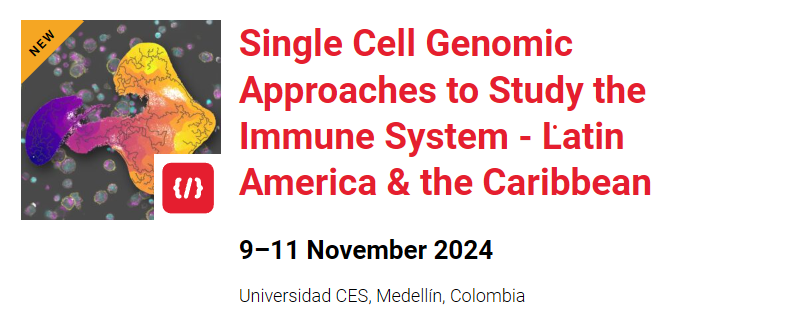

</center>

# 1️⃣ **Install some extra packages**

In [ ]:
! python -m pip install cffi==1.16.0  #1.17.1
! python -m pip install anndata==0.10.8
! python -m pip install "muon"

  Using cached anndata-0.10.8-py3-none-any.whl.metadata (6.6 kB)
Using cached anndata-0.10.8-py3-none-any.whl (124 kB)
  Attempting uninstall: anndata
    Found existing installation: anndata 0.10.1
    Uninstalling anndata-0.10.1:
      Successfully uninstalled anndata-0.10.1
  Using cached muon-0.1.7-py3-none-any.whl.metadata (7.2 kB)
  Using cached mudata-0.3.1-py3-none-any.whl.metadata (8.3 kB)
Using cached muon-0.1.7-py3-none-any.whl (293 kB)
Using cached mudata-0.3.1-py3-none-any.whl (41 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.6/316.6 kB 5.9 MB/s eta 0:00:00


In [ ]:
! python -m pip install "harmonypy"

  Using cached harmonypy-0.0.10-py3-none-any.whl.metadata (3.9 kB)
Using cached harmonypy-0.0.10-py3-none-any.whl (20 kB)


# 2️⃣ **Install MMoCHI**

In order to install MMoCHI, first clone its Github repository.

In [ ]:
! git clone https://github.com/donnafarberlab/mmochi.git && cd mmochi

fatal: destination path 'mmochi' already exists and is not an empty directory.


Then, install conda for Collab. Note that this step may restart the Jupyter (Collab) kernel. If this happens, just ignore it and continue with the next steps. Everything should be alright.



In [ ]:
# install condacolab
!pip install -q condacolab
import condacolab
condacolab.install()


✨🍰✨ Everything looks OK!


Now you can proceed to generate a conda environment with MMoCHI and all its dependences installed on it.

In [ ]:
! cd mmochi && conda install -c conda-forge --file requirements.txt

Channels:
 - conda-forge
Platform: linux-64
Solving environment: - \ | / - \ | / - \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.9.2

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.



In [ ]:
!cd mmochi && python -m pip install ".[landmarking,pytest]"

Processing /content/mmochi
  Preparing metadata (setup.py) ... done
  Created wheel for mmochi: filename=mmochi-0.3.0-py3-none-any.whl size=86478 sha256=5e5d0d02370e1045f1959b98394bc019ccb92c2d4b09f54a9a3037579b2a388f
  Stored in directory: /tmp/pip-ephem-wheel-cache-r69o4ilc/wheels/4d/b0/47/dca16a7921221aae78d91473250eaef4583b3e9388fac9bfcd
Successfully built mmochi
  Attempting uninstall: mmochi
    Found existing installation: mmochi 0.3.0
    Uninstalling mmochi-0.3.0:
      Successfully uninstalled mmochi-0.3.0


Congrats! Now you are ready for running MMoCHI.

# 3️⃣ **Run MMoCHI**

## 3.1. Load libraries and data

First, load all the python libraries required and setup some useful global variables

In [ ]:
# MMoCHI tutorial libraries
import anndata
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['legend.frameon'] = 'False'
plt.show() # so that the first plot will respect rcParams

import mmochi as mmc
import os


# Libraries added by us

import seaborn as sns
import matplotlib as mpl
from muon import prot as pt

In [ ]:
# log
mmc.log_to_file('integrated_classification')

# defaults
mmc.DATA_KEY = 'protein'
mmc.BATCH_KEY = 'batch'
batch_suffix='MMoCHI_YASCP_dataset'

Then, load the test data to run this Collab notebook

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')


# # YASCP DATASET

batch_yascp=batch_suffix
batch_yascp1=batch_suffix+"_1"
batch_yascp2=batch_suffix+"_2"

Isotypes=['Mouse_IgG1_isotype_Ctrl',
'Mouse_IgG2a_isotype_Ctrl',
'Mouse_IgG2b_isotype_Ctrl',
'Rat_IgG2b_Isotype_Ctrl',
'Rat_IgG1_isotype_Ctrl',
'Rat_IgG2a_Isotype_Ctrl',
'Armenian_Hamster_IgG_Isotype_Ctrl']

# paths
#  raw
os.system("wget https://github.com/WCSCourses/Single_Cell_Genomics_ImmuneSys_24/raw/refs/heads/main/course_data/Module2_CITEseq/10X_multimodal_dataset_downsample3000.tar.gz")
os.system("tar xf 10X_multimodal_dataset_downsample3000.tar.gz")

data_adt = 'YASCP_downsample_3000_MEX_ADT'
data_gex = 'YASCP_downsample_3000_MEX_GEX'
#data_adt = '/content/drive/MyDrive/YASCP Dataset/YASCP_downsample_1000_MEX_ADT'
#data_gex = '/content/drive/MyDrive/YASCP Dataset/YASCP_downsample_1000_MEX_GEX'

# loading as AnnData
adata_adt=sc.read_10x_mtx(data_adt,gex_only=False)
adata_gex=sc.read_10x_mtx(data_gex,gex_only=False)

# checking names
assert(adata_gex.obs_names == adata_adt.obs_names).all(), "Los nombres de las celdas no coinciden entre los dos conjuntos de datos."



And setup a proper multimodal AnnData object to process using standard the MMoCHI preprocessing function.

In [ ]:
# properly set the ADT AnnData
adata_adt.layers["counts"]=adata_adt.X.copy()
adata_gex.layers["counts"]=adata_gex.X.copy()

adata_adt.var['feature_types']='Antibody Capture'
adata_adt.var_names_make_unique()

# Centered-Log-Ratio (CLR) to ADT AnnData

pt.pp.clr(adata_adt)


# this involves transforming the ADT sparse matrix to a pandas dataframe
df_adt=pd.DataFrame(adata_adt.X.todense())
df_adt.columns=adata_adt.var_names
df_adt.index=adata_adt.obs_names


# intersect cells in ADT and GEX AnnDatas
#import collections as co
#intersection = co.Counter(adata_gex.obs_names) & co.Counter(adata_adt.obs_names)
#intersectionOK=list(intersection.elements())
#df_adt = df_adt[df_adt.index.isin(intersectionOK)]

# properly set the GEX AnnData
adata_gex.var['feature_types']='Gene Expression'
adata_gex.var_names_make_unique()

#adata_gex=adata_gex[adata_gex.obs_names.isin(intersectionOK)]

# save as h5ad for other annotation methods
#import hdf5plugin
#adata_gex.write_h5ad("YASCP_data_from_mmochi_RNA.h5ad",
#    compression=hdf5plugin.FILTERS["zstd"]
#)

# save as csv for other annotation methods
df_gex=pd.DataFrame(adata_gex.X.toarray())
df_gex.columns=adata_gex.var_names
df_gex.index=adata_gex.obs_names
df_gex.to_csv("YASCP_data_from_mmochi_RNA.csv", index=True)

# Finally load the ADT Dataframe in the obsm section of the GEX AnnData
adata_gex.obsm['protein']=df_adt

# default mmochi preprocessing
mmc.utils.preprocess_adatas(adatas=adata_gex,
                            data_key='protein',
                            log_CP_ADT=1e3,
                            log_CP_GEX=1e4,
                            convert_from_10X=False)

adata_yascp=adata_gex

## 3.2. QC preprocessing


In [ ]:
# version con un solo dataset (no funciona)
adata = anndata.concat([adata_yascp], merge='first',
                       keys=[batch_yascp], label='batch', index_unique='_')

#adata.obsm['protein'].drop(Isotypes, axis=1, inplace=True)


... storing 'feature_types' as categorical


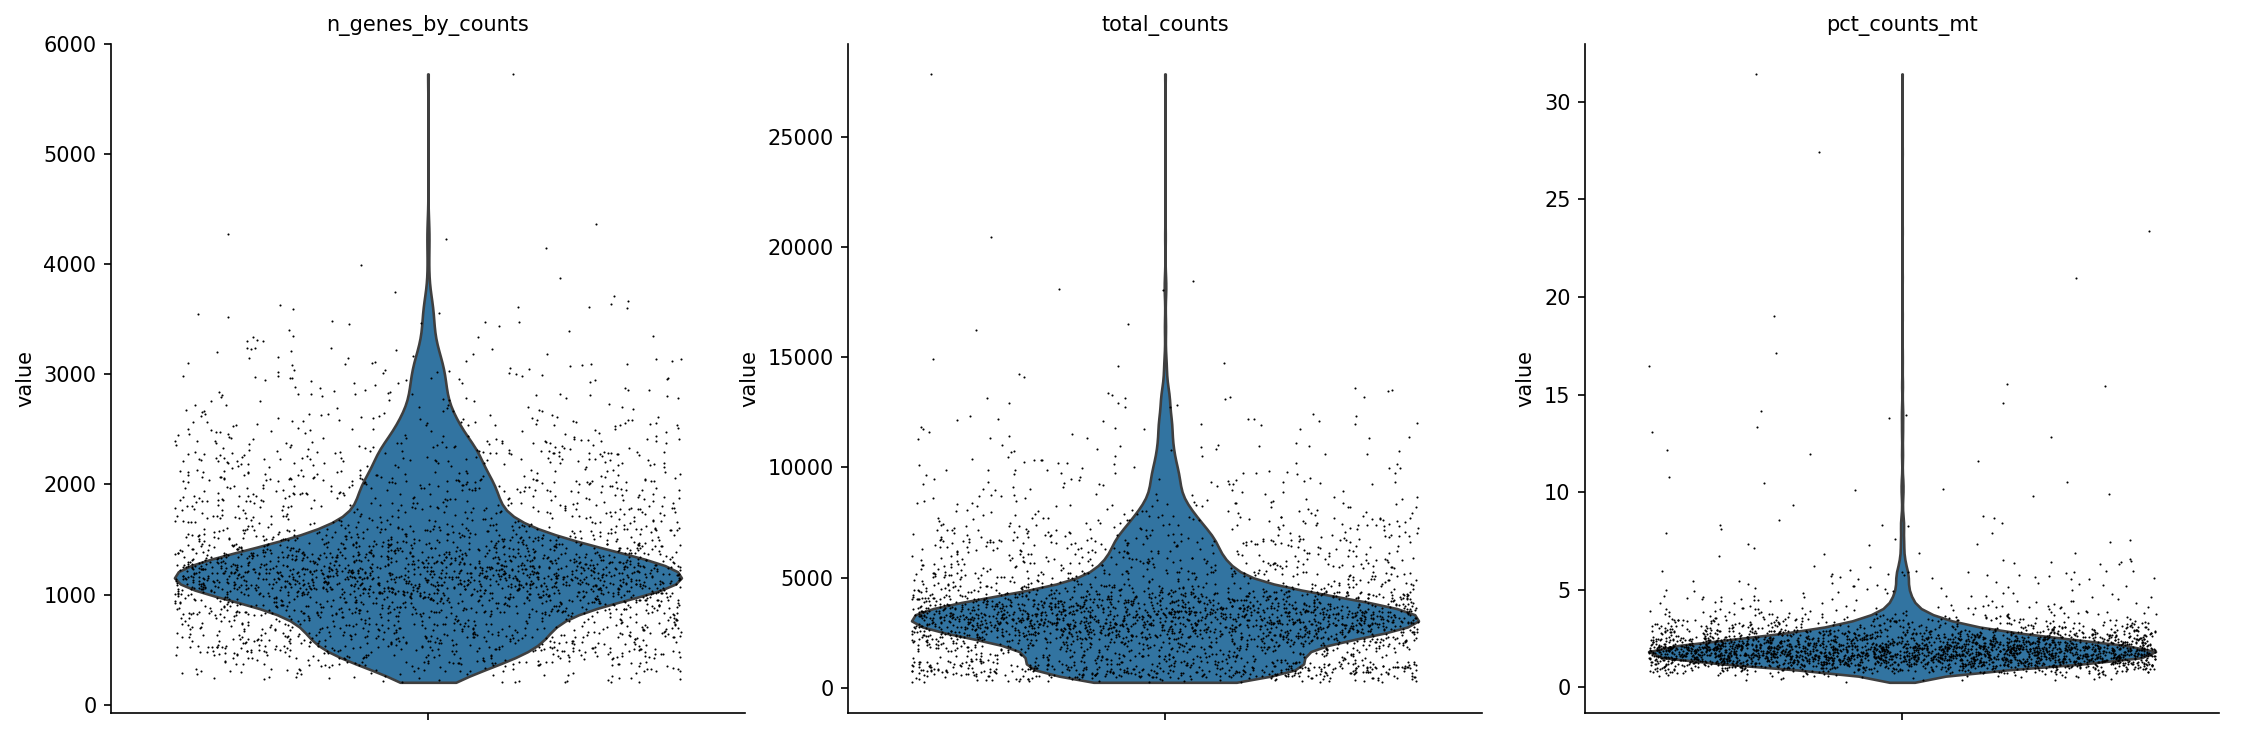

In [ ]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

# plot
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

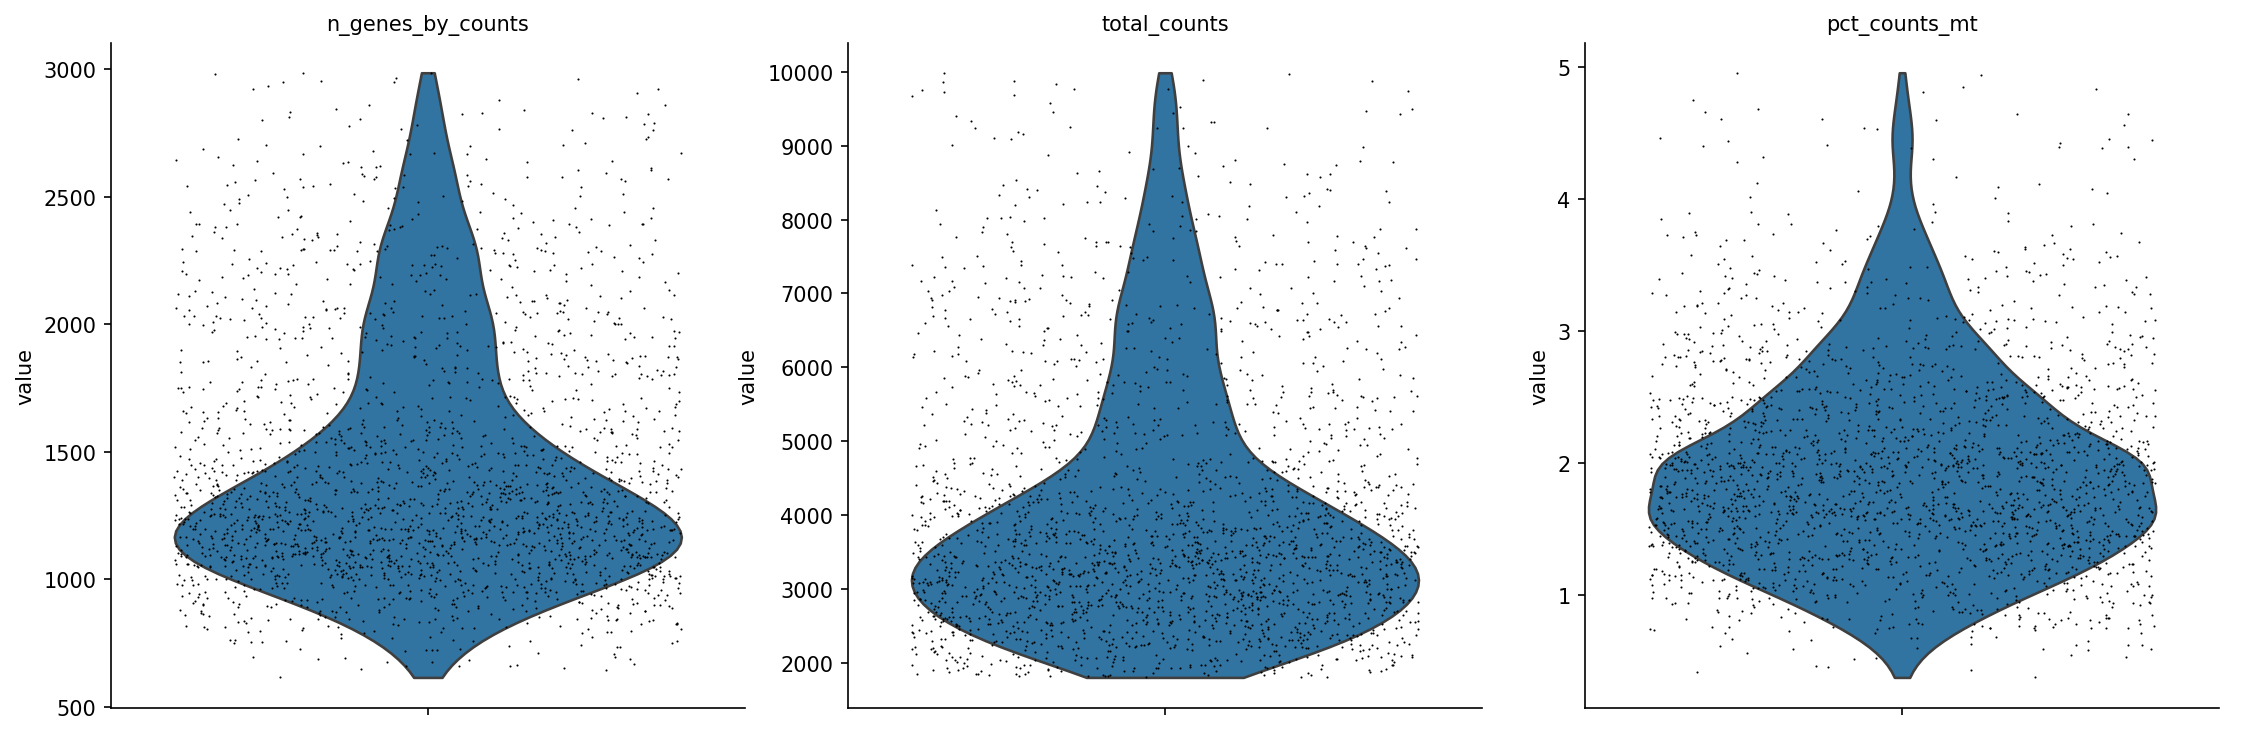

In [ ]:
# filter cells with 0 genes
sc.pp.filter_cells(adata, min_genes=200)

# filter cells with too many genes (based on the violin plots above)
sc.pp.filter_cells(adata,max_genes=3000)

# filter cells with more than 5% of MT gene expression
adata = adata[adata.obs['pct_counts_mt'] < 5, :]

# filter cell with too many counts per cell
adata = adata[adata.obs['total_counts'] < 10000, :]

# filter cell with too few counts per cell
adata = adata[adata.obs['total_counts'] > 1800, :]

# plot
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

# 4️⃣ **Normalization, integration and identification of clusters**

## 4.1. Perform a basic preprocessing of single-cell data:

+ ADT normalization with Centered Log Ratio (CLR)
+ Identification of variable features
+ Dimensionallity reduction with PCA
+ Harmony batch integration
+ Identification of neighboors
+ Annotation of clusters
+ Generation of a UMAP embedding


In [ ]:
sc.pp.log1p(adata) # I added this. It has to be done before 'highly_variable_genes'.
                   # but it's strange given that i 'log_CP_GEX=1e4' in 'mmc.utils.preprocess_adatas'

sc.pp.highly_variable_genes(adata)
sc.pp.pca(adata)
sc.external.pp.harmony_integrate(adata, adjusted_basis='X_pca', key='batch',
                                 verbose=False, max_iter_harmony=20)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=2)
#np.savetxt('data/Integrated_Classification_X_umap.txt', adata.obsm['X_umap'])
#adata.obs['leiden'].to_csv('data/Integrated_Classification_leiden.csv')

2024-11-10 05:36:16,148 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO - Computing initial centroids with sklearn.KMeans...
2024-11-10 05:36:17,153 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO - sklearn.KMeans initialization complete.
<ipython-input-14-6a11ad586ff3>:10: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=2)


Now you can visualize the UMAP and annotated clusters

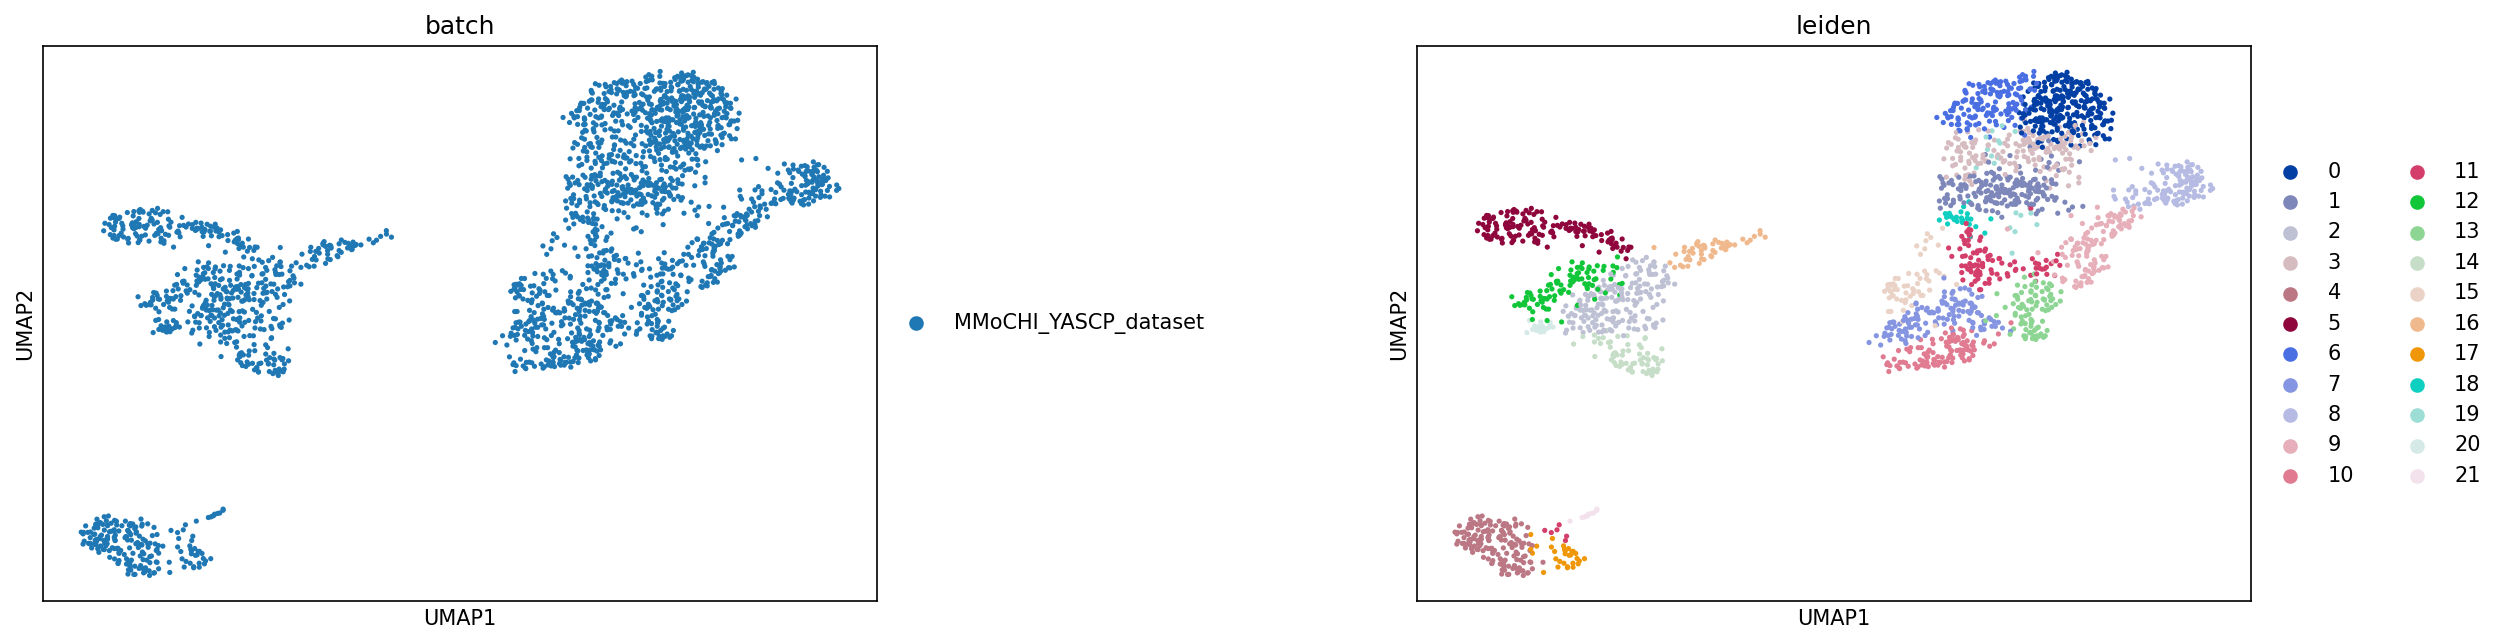

In [ ]:
# plot gene expression UMAP
sc.pl.umap(adata, color=['batch','leiden'], s=25, sort_order=False, wspace =.5)
#sc.pl.umap(adata, color=['leiden'], s=25, sort_order=False, wspace =.5)

# 5️⃣ **Data exploration and masking of potential doublets**

### 5.1. Visualize RNA levels of typical immune markers

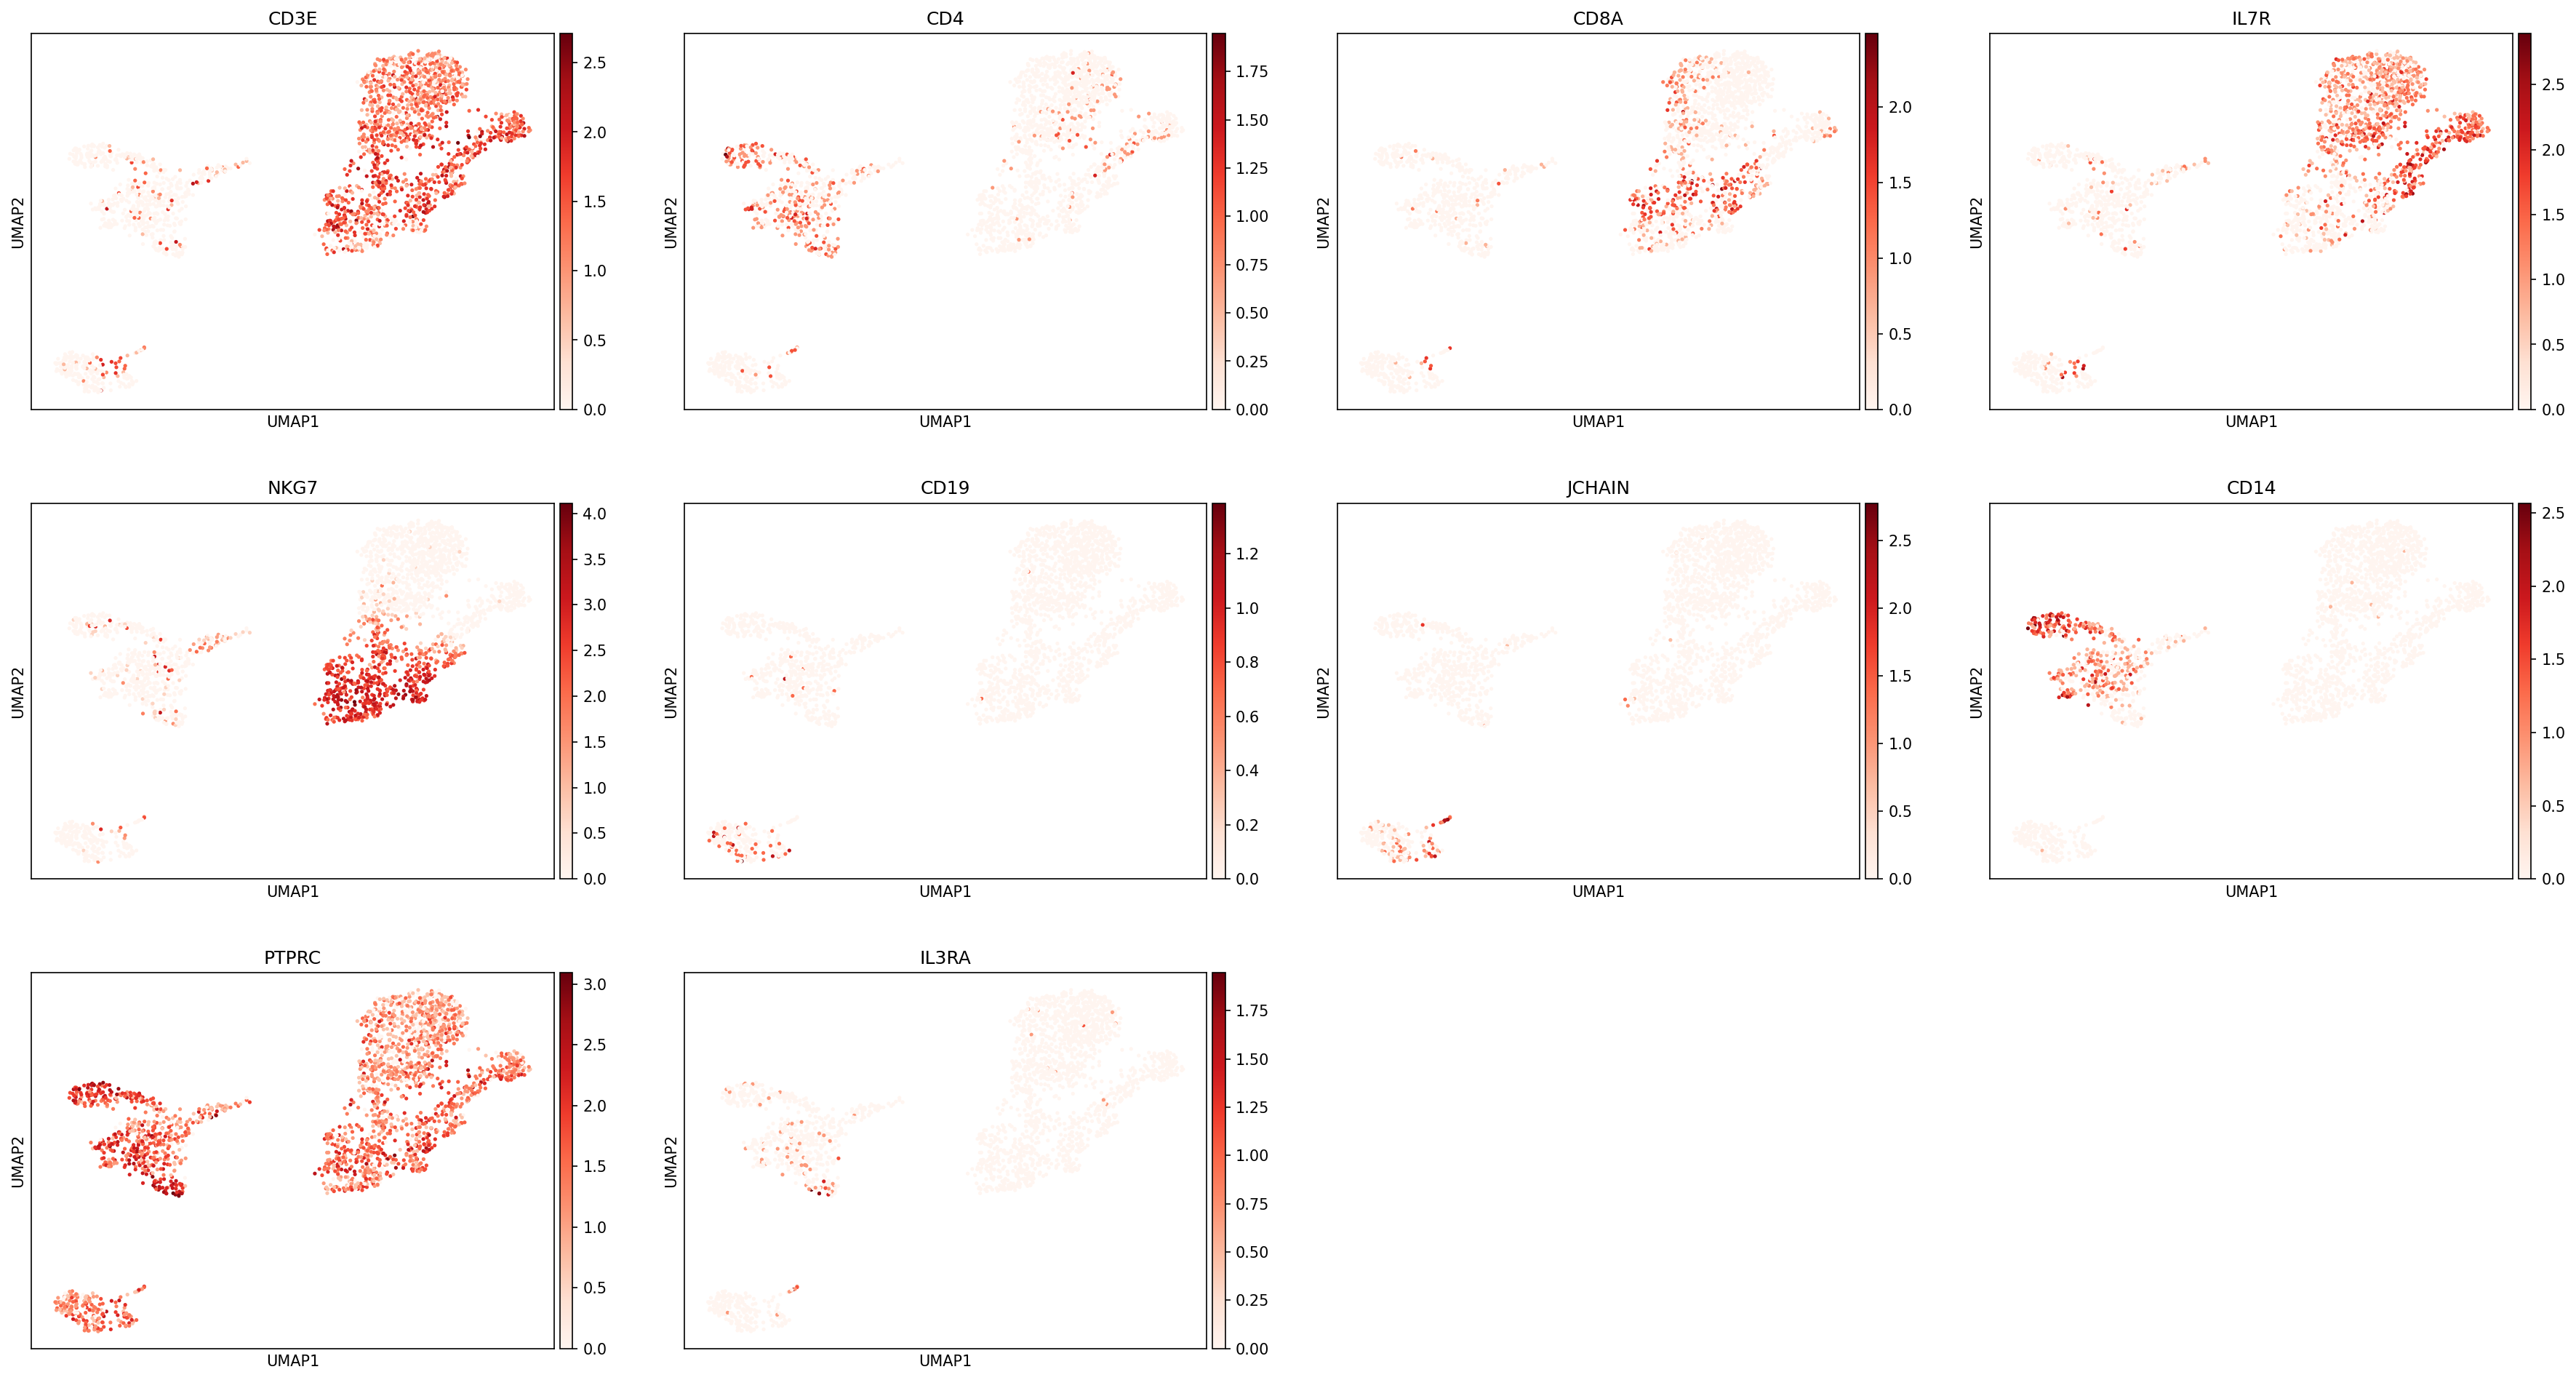

In [ ]:
# plot gene expression UMAP colored by marker genes (GEX)
sc.pl.umap(adata, color=['CD3E','CD4','CD8A','IL7R','NKG7','CD19','JCHAIN','CD14','PTPRC','IL3RA'], # IL3RA = CD123
           s=25, sort_order=False, cmap='Reds')

### 5.2. Visualize ADT levels of typical immune markers

/usr/local/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


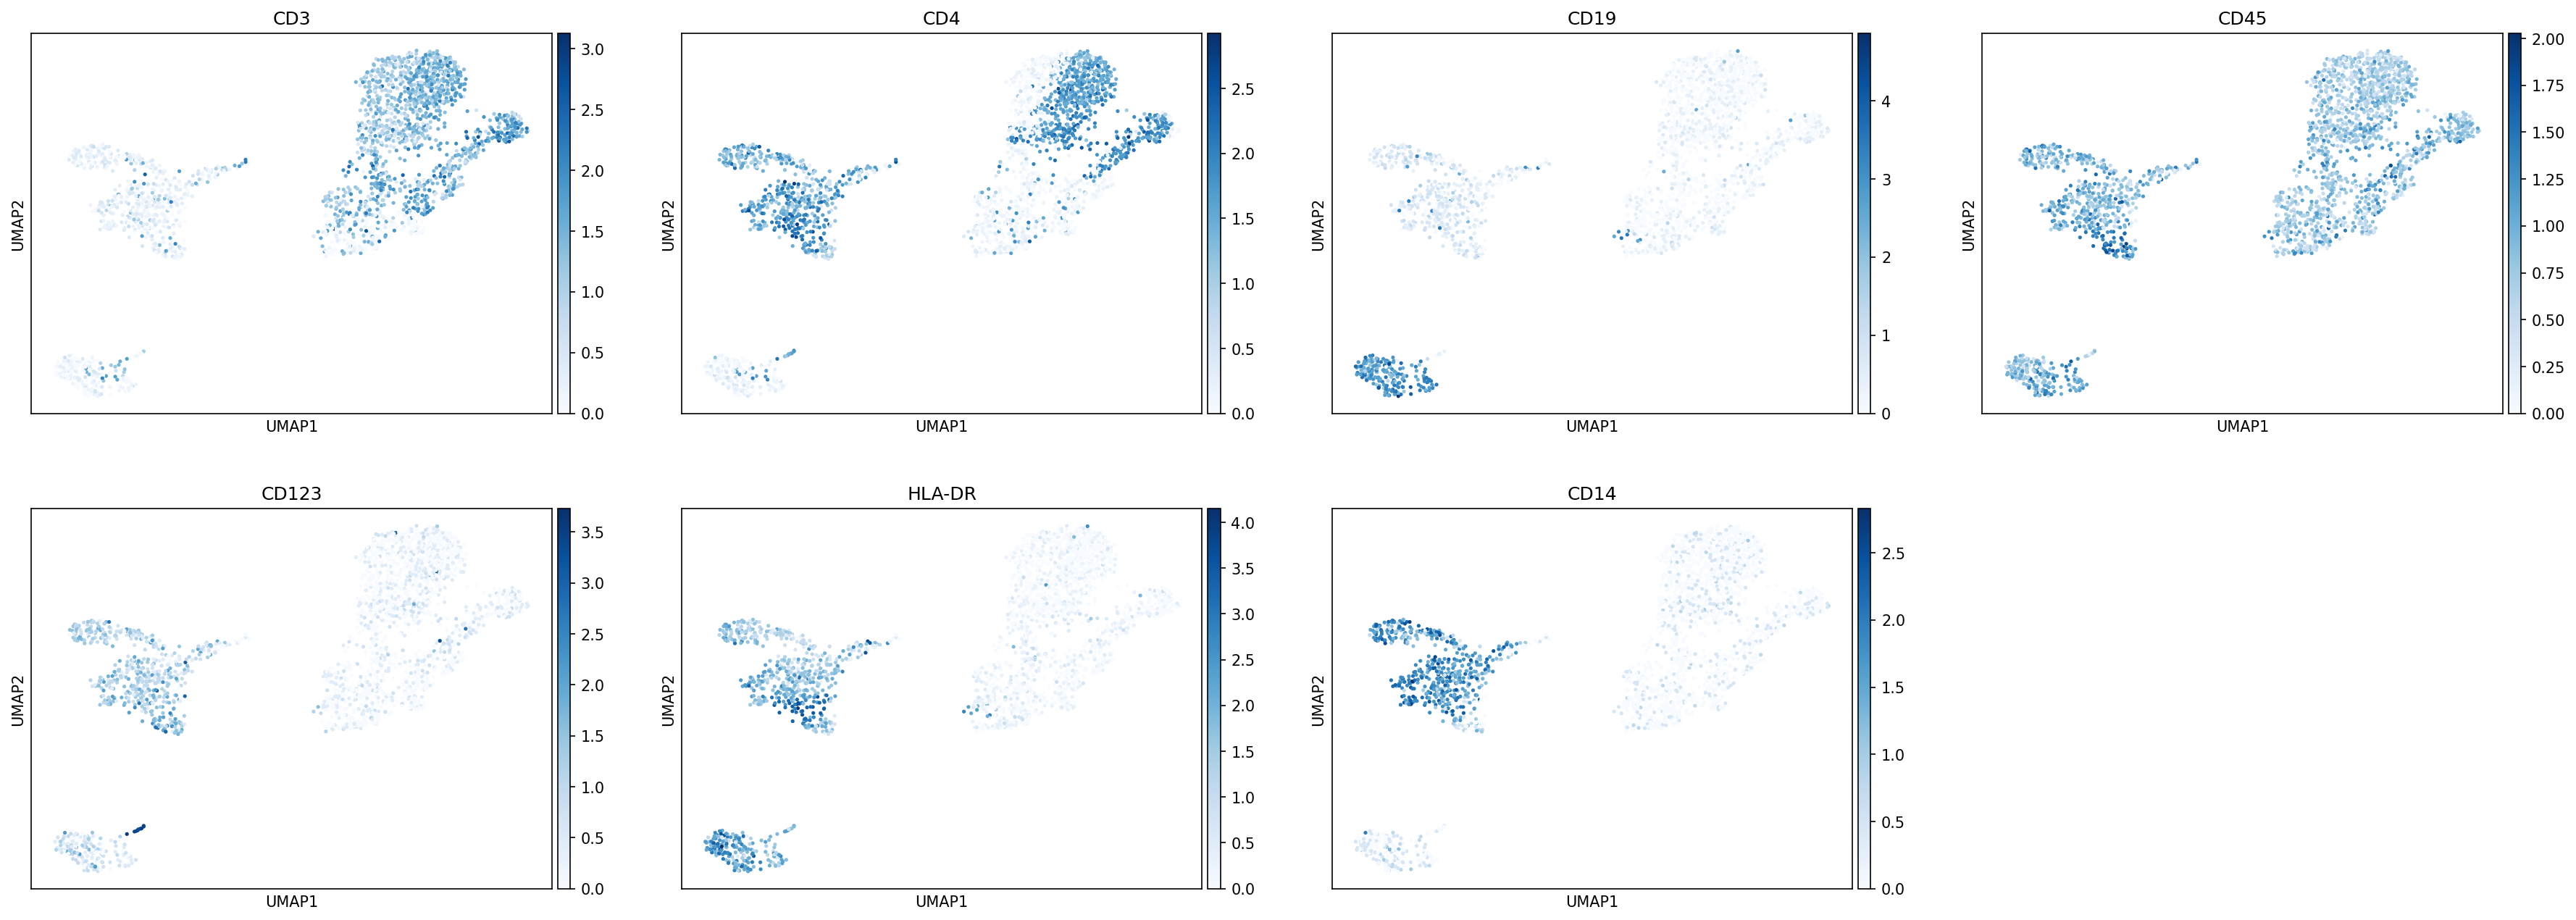

In [ ]:
# plot gene expression UMAP colored by marker proteins (ADT)
protein_adata = anndata.AnnData(adata.obsm['protein'], adata.obs.copy(), dtype=float)
protein_adata.obsm['X_umap'] = adata.obsm['X_umap'].copy()
sc.pl.umap(protein_adata, color=['CD3',
                                 'CD4',
                                 #'CD8',
                                 #'anti-human_IL7R',
                                 #'anti-human_NKG7',
                                 'CD19',
                                 'CD45',
                                 'CD123',
                                 'HLA-DR',
                                 #'anti-human_JCHAIN',
                                 'CD14'],
                                #'CD119_(IFN-_R_chain)'],
           s=25, sort_order=False, cmap='Blues')

### 5.3. Mask clusters expressing incompatible markers, such as CD3 and CD19

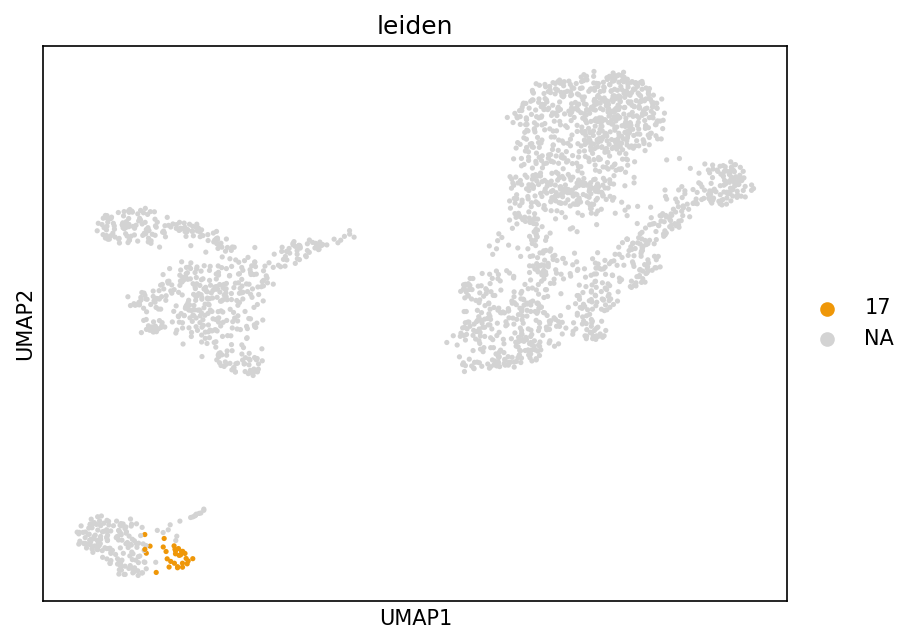

In [ ]:
# CD3 and CD19 positive cells are likely to be doublets. This is seen in the cluster 22
doubletsCluster='17'
sc.pl.umap(adata,color=['leiden',], s=25, sort_order=False, wspace =.5, groups=[doubletsCluster])

In [ ]:
# So we will mask this cluster
adata.obs['T_B doublets'] = adata.obs.leiden.isin([doubletsCluster]).astype(str)

# 6️⃣ **Definition of a hierarchy**

In [ ]:
h=mmc.Hierarchy(default_min_events=15, default_class_weight = 'balanced')


# cutfoff node
h.add_classification('Removal', 'All', ['T_B doublets'], is_cutoff=True)
h.add_subset('Potential Doublets', 'Removal', ['True'])
h.add_subset('To classify', 'Removal', ['False'])

# general layer
h.add_classification('Broad Lineages', 'To classify', ['CD14','CD33','MARCO','MERTK','CD3','CD19','JCHAIN','LILRA4'])
h.add_subset('Lymphocyte', 'Broad Lineages', dict(neg=['CD14','CD33','MARCO','MERTK'], any_of=['CD3','CD19','JCHAIN'], n=1))
h.add_subset('Myelocyte', 'Broad Lineages', dict(any_of=['CD14','CD33','MARCO','MERTK','LILRA4'], neg=['CD3','CD19'], n=1))

# more specific layers
h.add_classification('Lymphoid', 'Lymphocyte', ['CD3','CD19','CD56','CD127','JCHAIN'])
h.add_subset('T cell', 'Lymphoid', dict(pos=['CD3','CD127'], neg=['CD19','JCHAIN']))
h.add_subset('B cell', 'Lymphoid', dict(any_of=['CD19'], neg=['CD3','CD127','JCHAIN']))
h.add_subset('Plasma cell', 'Lymphoid', dict(any_of=['JCHAIN'], neg=['CD3','CD127']))
h.add_subset('NK_ILC', 'Lymphoid', dict(neg=['CD19','JCHAIN','CD3'], any_of=['CD127','CD56']))

h.add_classification('NK_ILC Subsets', 'NK_ILC', ['CD127','EOMES'])
h.add_subset('NK', 'NK_ILC Subsets', dict(neg=['CD127',], pos=['EOMES',]))
h.add_subset('ILC', 'NK_ILC Subsets', dict(pos=['CD127',], neg=['EOMES',]))

h.add_classification('CD4_CD8', 'T cell', ['CD4','CD8a','CD4_gex','CD8A_gex'])
h.add_subset('CD4 T cell', 'CD4_CD8', dict(pos=['CD4',], neg=['CD8a','CD8A_gex']))
h.add_subset('CD8 T cell', 'CD4_CD8', dict(neg=['CD4','CD4_gex'], pos=['CD8a','CD8A_gex']))

h.display()




All
└── *Removal*
    ├── Potential Doublets (T_B doublets==True)
    └── To classify (T_B doublets==False)
        └── *Broad Lineages*
            ├── Lymphocyte (CD14- CD33- MARCO- MERTK-) and [1 of (CD3+ CD19+ JCHAIN+)]
            │   └── *Lymphoid*
            │       ├── B cell (CD3- CD127- JCHAIN-) and [1 of (CD19+)]
            │       ├── NK_ILC (CD19- JCHAIN- CD3-) and [1 of (CD127+ CD56+)]
            │       │   └── *NK_ILC Subsets*
            │       │       ├── ILC (CD127+ EOMES-)
            │       │       └── NK (EOMES+ CD127-)
            │       ├── Plasma cell (CD3- CD127-) and [1 of (JCHAIN+)]
            │       └── T cell (CD3+ CD127+ CD19- JCHAIN-)
            │           └── *CD4_CD8*
            │               ├── CD4 T cell (CD4+ CD8a- CD8A_gex-)
            │               └── CD8 T cell (CD8a+ CD8A_gex+ CD4- CD4_gex-)
            └── Myelocyte (CD3- CD19-) and [1 of (CD14+ CD33+ MARCO+ MERTK+ LILRA4+)]



Explore thresholds to set up positive and negative markers

/usr/local/lib/python3.10/site-packages/mmochi/thresholding.py:324: RuntimeWarning: invalid value encountered in greater
  mask = data > 0
CD19 not found in adata, skipping thresholding.
T_B doublets not found in adata, skipping thresholding.
/usr/local/lib/python3.10/site-packages/mmochi/thresholding.py:324: RuntimeWarning: invalid value encountered in greater
  mask = data > 0
CD127 not found in adata, skipping thresholding.
/usr/local/lib/python3.10/site-packages/mmochi/thresholding.py:324: RuntimeWarning: invalid value encountered in greater
  mask = data > 0
CD33 not found in adata, skipping thresholding.
/usr/local/lib/python3.10/site-packages/mmochi/thresholding.py:324: RuntimeWarning: invalid value encountered in greater
  mask = data > 0
CD4 not found in adata, skipping thresholding.
/usr/local/lib/python3.10/site-packages/mmochi/thresholding.py:324: RuntimeWarning: invalid value encountered in greater
  mask = data > 0
CD56 not found in adata, skipping thresholding.


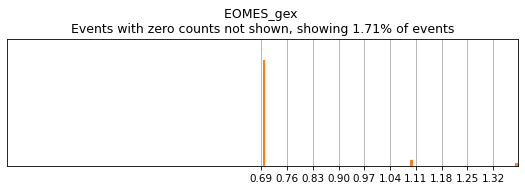

FloatSlider(value=0.5, layout=Layout(width='600px'), max=1.3862943649291992)

FloatSlider(value=0.0, layout=Layout(width='600px'), max=1.3862943649291992)

/usr/local/lib/python3.10/site-packages/mmochi/thresholding.py:324: RuntimeWarning: invalid value encountered in greater
  mask = data > 0
CD3 not found in adata, skipping thresholding.


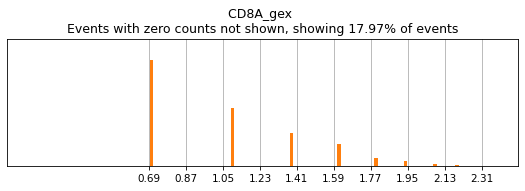

FloatSlider(value=0.5, layout=Layout(width='600px'), max=2.4849066734313965)

FloatSlider(value=0.0, layout=Layout(width='600px'), max=2.4849066734313965)

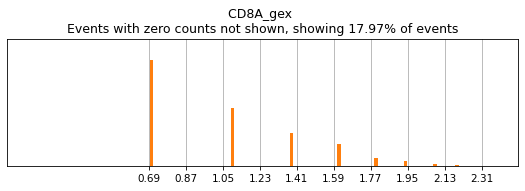

FloatSlider(value=0.5, layout=Layout(width='600px'), max=2.4849066734313965)

FloatSlider(value=0.0, layout=Layout(width='600px'), max=2.4849066734313965)

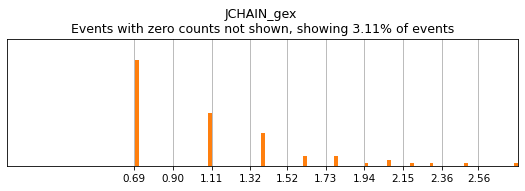

FloatSlider(value=0.5, layout=Layout(width='600px'), max=2.7725887298583984)

FloatSlider(value=0.0, layout=Layout(width='600px'), max=2.7725887298583984)

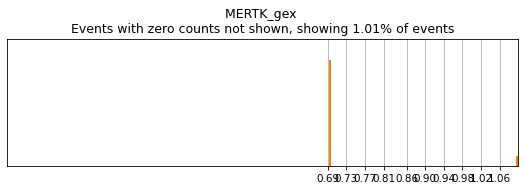

FloatSlider(value=0.5, layout=Layout(width='600px'), max=1.0986123085021973)

FloatSlider(value=0.0, layout=Layout(width='600px'), max=1.0986123085021973)

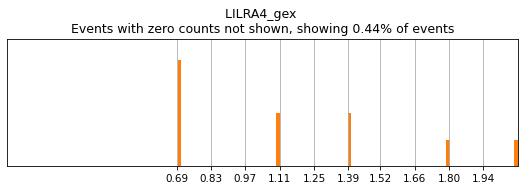

FloatSlider(value=0.5, layout=Layout(width='600px'), max=2.079441547393799)

FloatSlider(value=0.0, layout=Layout(width='600px'), max=2.079441547393799)

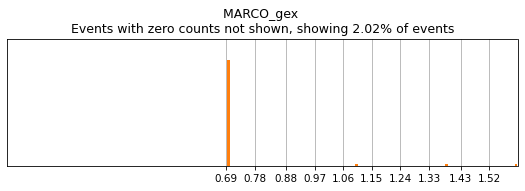

FloatSlider(value=0.5, layout=Layout(width='600px'), max=1.6094379425048828)

FloatSlider(value=0.0, layout=Layout(width='600px'), max=1.6094379425048828)

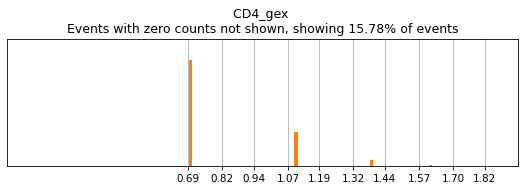

FloatSlider(value=0.5, layout=Layout(width='600px'), max=1.9459102153778076)

FloatSlider(value=0.0, layout=Layout(width='600px'), max=1.9459102153778076)

/usr/local/lib/python3.10/site-packages/mmochi/thresholding.py:324: RuntimeWarning: invalid value encountered in greater
  mask = data > 0
CD14 not found in adata, skipping thresholding.


Completed!


Button(description='Click to run thresholds!', style=ButtonStyle())

Output()

In [ ]:
h.run_all_thresholds(adata, mode='fancy rerun all')

In [ ]:
# classify
adata,h = mmc.classify(adata, h, 'lin', retrain = True, weight_integration=True,data_key="protein",resample_method='oversample')

# generate classification column
adata = mmc.terminal_names(adata)

Setting up...
Using .X and protein


Removing 10708 features lacking expression in a minimum of 25 events...
Resorting to enforce sorted order of features by name


Set up complete.
Using 11142 features


Running with batch batch
Using weights of: [1.0] for random forest n_estimators


Data subsetted on All in All
Running high-confidence populations for Removal...


Running high-confidence thresholds in MMoCHI_YASCP_dataset


Performing cutoff for Removal...
Merging data into adata.obsm['lin']
Predicted:
Removal_class
To classify           2251
Potential Doublets      30
Name: count, dtype: int64
Data subsetted on To classify in Removal
Running high-confidence populations for Broad Lineages...


Running high-confidence thresholds in MMoCHI_YASCP_dataset


CD14_mod_protein
Current upper threshold is: 0.8906454599671507 What should the upper threshold be?


Invalid input, defaulting to threshold of 0.8906454599671507


CD33_mod_protein
MARCO_gex


### 6.2. You can graphically visualize the hierarchy

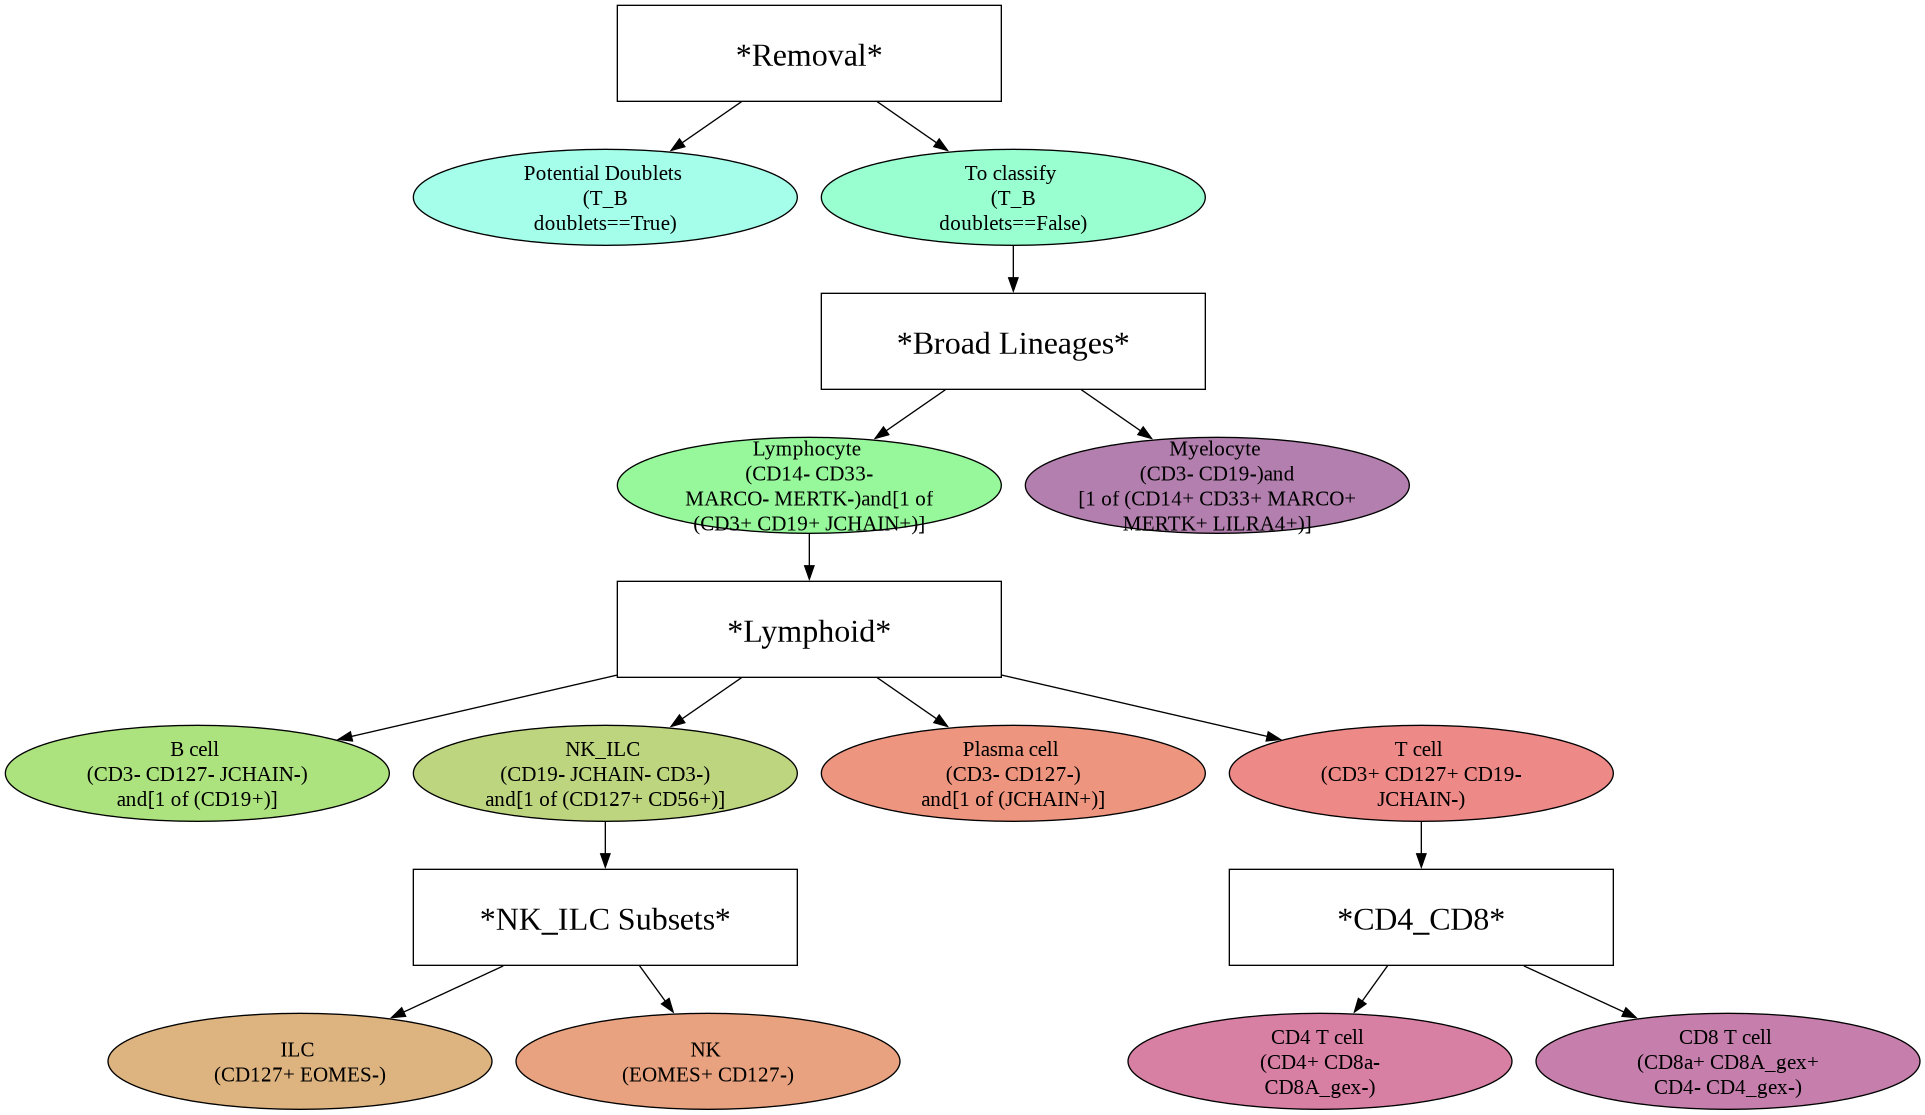

In [ ]:
# Hierarchy tree
h.color_dict(True, rot=1, hue=3, mode='DEPTH')
h.display(True)

### 6.3. Explore the prediction

In [ ]:
# annotation details generated by the classification step
adata.obsm["lin"]

All_class   Removal_hc Removal_class  \
MMoCHi_obs_names                                                               
AAACCTGAGTGTACCT-1_MMoCHI_YASCP_dataset       All  To classify   To classify   
AAACCTGGTTGCCTCT-1_MMoCHI_YASCP_dataset       All  To classify   To classify   
AAACCTGTCCAGGGCT-1_MMoCHI_YASCP_dataset       All  To classify   To classify   
AAACCTGTCGCTGATA-1_MMoCHI_YASCP_dataset       All  To classify   To classify   
AAACCTGTCTGATACG-1_MMoCHI_YASCP_dataset       All  To classify   To classify   
...                                           ...          ...           ...   
TTTGGTTGTTGGACCC-1_MMoCHI_YASCP_dataset       All  To classify   To classify   
TTTGGTTTCCCACTTG-1_MMoCHI_YASCP_dataset       All  To classify   To classify   
TTTGTCAGTAGTGAAT-1_MMoCHI_YASCP_dataset       All  To classify   To classify   
TTTGTCAGTCATACTG-1_MMoCHI_YASCP_dataset       All  To classify   To classify   
TTTGTCATCCTAGTGA-1_MMoCHI_YASCP_dataset       All  To classify   To classify   

                                        Broad Lineages_hc  \
MMoCHi_obs_names                                            
AAACCTGAGTGTACCT-1_MMoCHI_YASCP_dataset                 ?   
AAACCTGGTTGCCTCT-1_MMoCHI_YASCP_dataset                 ?   
AAACCTGTCCAGGGCT-1_MMoCHI_YASCP_dataset                 ?   
AAACCTGTCGCTGATA-1_MMoCHI_YASCP_dataset         Myelocyte   
AAACCTGTCTGATACG-1_MMoCHI_YASCP_dataset        Lymphocyte   
...                                                   ...   
TTTGGTTGTTGGACCC-1_MMoCHI_YASCP_dataset                 ?   
TTTGGTTTCCCACTTG-1_MMoCHI_YASCP_dataset         Myelocyte   
TTTGTCAGTAGTGAAT-1_MMoCHI_YASCP_dataset         Myelocyte   
TTTGTCAGTCATACTG-1_MMoCHI_YASCP_dataset                 ?   
TTTGTCATCCTAGTGA-1_MMoCHI_YASCP_dataset                 ?   

                                         Broad Lineages_holdout  \
MMoCHi_obs_names                                                  
AAACCTGAGTGTACCT-1_MMoCHI_YASCP_dataset                    True   
AAACCTGGTTGCCTCT-1_MMoCHI_YASCP_dataset                    True   
AAACCTGTCCAGGGCT-1_MMoCHI_YASCP_dataset                    True   
AAACCTGTCGCTGATA-1_MMoCHI_YASCP_dataset                   False   
AAACCTGTCTGATACG-1_MMoCHI_YASCP_dataset                   False   
...                                                         ...   
TTTGGTTGTTGGACCC-1_MMoCHI_YASCP_dataset                    True   
TTTGGTTTCCCACTTG-1_MMoCHI_YASCP_dataset                   False   
TTTGTCAGTAGTGAAT-1_MMoCHI_YASCP_dataset                   False   
TTTGTCAGTCATACTG-1_MMoCHI_YASCP_dataset                    True   
TTTGTCATCCTAGTGA-1_MMoCHI_YASCP_dataset                    True   

                                         Broad Lineages_opt_holdout  \
MMoCHi_obs_names                                                      
AAACCTGAGTGTACCT-1_MMoCHI_YASCP_dataset                       False   
AAACCTGGTTGCCTCT-1_MMoCHI_YASCP_dataset                       False   
AAACCTGTCCAGGGCT-1_MMoCHI_YASCP_dataset                       False   
AAACCTGTCGCTGATA-1_MMoCHI_YASCP_dataset                       False   
AAACCTGTCTGATACG-1_MMoCHI_YASCP_dataset                       False   
...                                                             ...   
TTTGGTTGTTGGACCC-1_MMoCHI_YASCP_dataset                       False   
TTTGGTTTCCCACTTG-1_MMoCHI_YASCP_dataset                       False   
TTTGTCAGTAGTGAAT-1_MMoCHI_YASCP_dataset                       False   
TTTGTCAGTCATACTG-1_MMoCHI_YASCP_dataset                       False   
TTTGTCATCCTAGTGA-1_MMoCHI_YASCP_dataset                       False   

                                         Broad Lineages_traincounts  \
MMoCHi_obs_names                                                      
AAACCTGAGTGTACCT-1_MMoCHI_YASCP_dataset                         0.0   
AAACCTGGTTGCCTCT-1_MMoCHI_YASCP_dataset                         0.0   
AAACCTGTCCAGGGCT-1_MMoCHI_YASCP_dataset                         0.0   
AAACCTGTCGCTGATA-1_MMoCHI_YASCP_dataset               

... storing 'T_B doublets' as categorical


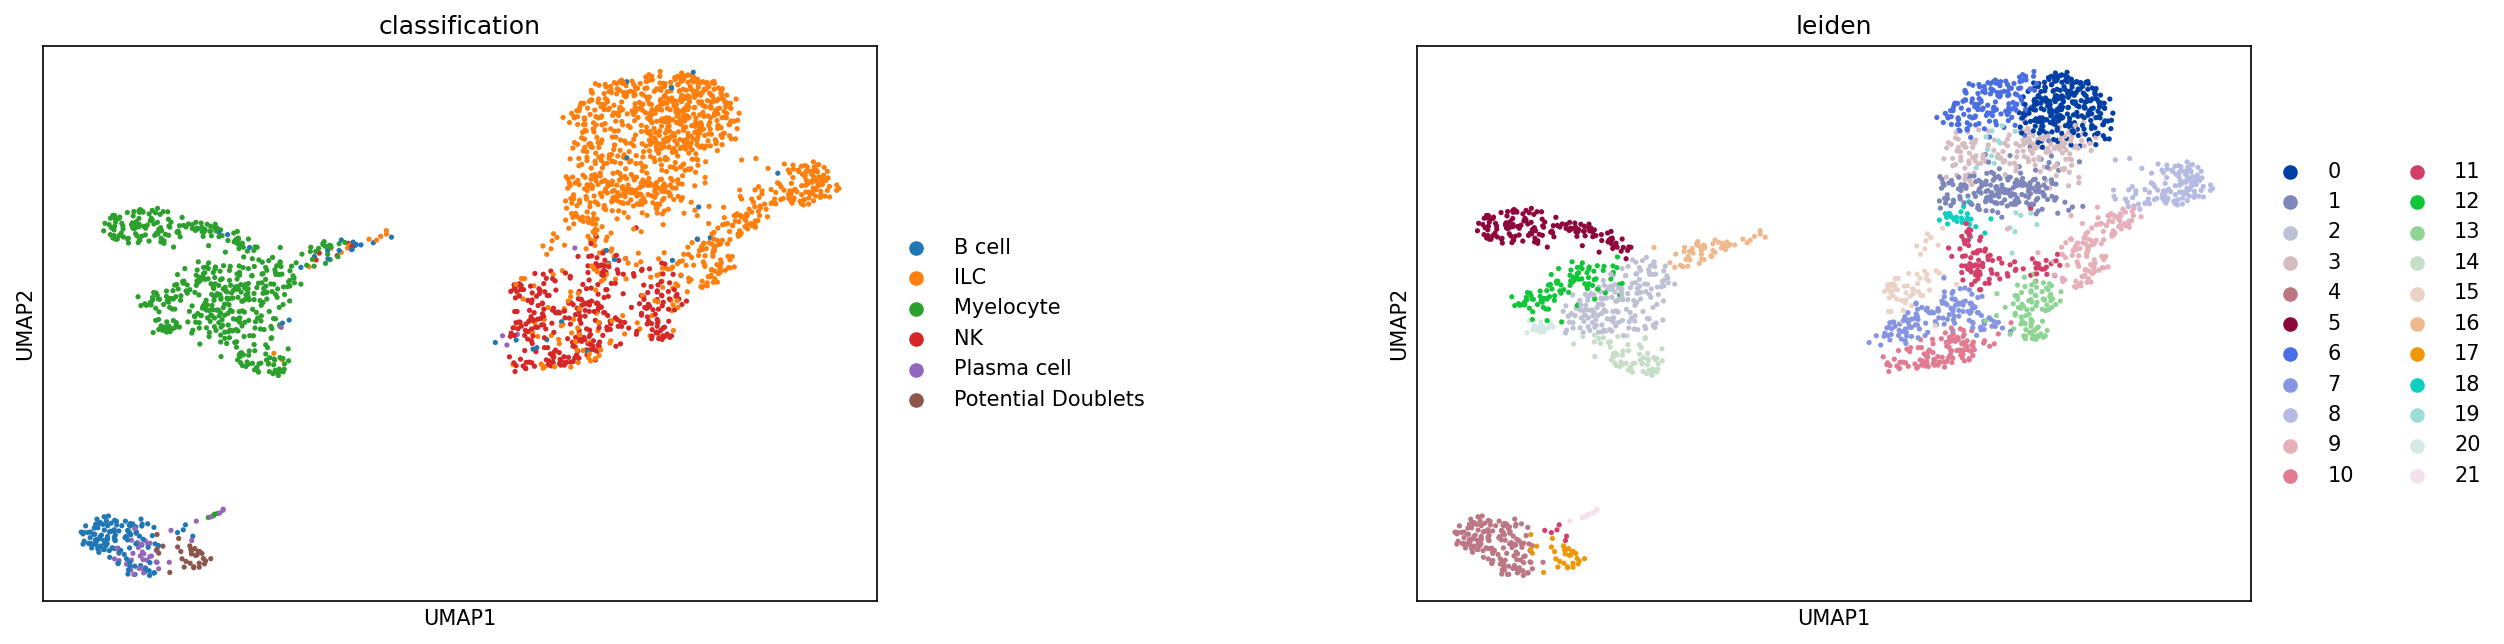

In [ ]:
sc.pl.umap(adata, color=['classification','leiden'], s=25, sort_order=False, wspace =.5)

# 🍕  *Lunch 🍕  (1 hour) - (13:00-14:00 h)*

# Thresholding

In [ ]:
# classify
adata,h = mmc.classify(adata, h, 'lin', retrain = True, weight_integration=True,data_key="protein",resample_method='oversample')

# generate classification column
adata = mmc.terminal_names(adata)


Setting up...
Using .X and protein


Removing 10708 features lacking expression in a minimum of 25 events...
Resorting to enforce sorted order of features by name


Set up complete.
Using 11142 features


Running with batch batch
Using weights of: [1.0] for random forest n_estimators


Data subsetted on All in All
Running high-confidence populations for Removal...


Running high-confidence thresholds in MMoCHI_YASCP_dataset


Performing cutoff for Removal...
Merging data into adata.obsm['lin']
Predicted:
Removal_class
To classify           2251
Potential Doublets      30
Name: count, dtype: int64
Data subsetted on To classify in Removal
Running high-confidence populations for Broad Lineages...


Running high-confidence thresholds in MMoCHI_YASCP_dataset


Preparing training data for Broad Lineages...


Checking subsets for minimum events...
{'max_depth': 20, 'n_estimators': 100, 'n_jobs': -1, 'bootstrap': True, 'verbose': True, 'max_features': 'sqrt'}
Manually made a balanced class_weight: {'Lymphocyte': 1.1039913914887212, 'Myelocyte': 2.3601793862745244}


Initializing classifier for Broad Lineages...


Training 100 new estimators using MMoCHI_YASCP_dataset...


Choosing training data...


1298 real cells in training set...


Resampling...


/usr/local/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
Found: 2 noise and 0 in danger of 1298 events.


Training with 2142 events after oversample resampling...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.5s


Merging data into adata.obsm['lin']
Running calibration on random forest


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
/usr/local/lib/python3.10/site-packages/mmochi/classifier.py:512: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[level + '_opt_holdout'] = df[level + '_opt_holdout'].fillna(False)
Calibration will not include separate _opt_holdout
Calibrating with method isotonic
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s


Predicting for Broad Lineages...


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s


Merging data into adata.obsm['lin']
Predicted:
Broad Lineages_class
Lymphocyte    1756
Myelocyte      495
Name: count, dtype: int64


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.9s finished


Data subsetted on Lymphocyte in Broad Lineages
Running high-confidence populations for Lymphoid...


Running high-confidence thresholds in MMoCHI_YASCP_dataset


Preparing training data for Lymphoid...


Checking subsets for minimum events...
Removing ['T cell'] cells as they are below 15 events
{'max_depth': 20, 'n_estimators': 100, 'n_jobs': -1, 'bootstrap': True, 'verbose': True, 'max_features': 'sqrt'}
Manually made a balanced class_weight: {'B cell': 3.136573805618997, 'NK_ILC': 1.0749330138850721, 'Plasma cell': 5.512018953267167}


Initializing classifier for Lymphoid...


Training 100 new estimators using MMoCHI_YASCP_dataset...


Choosing training data...


826 real cells in training set...


Resampling...


/usr/local/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
Found: 17 noise and 6 in danger of 826 events.


Training with 2154 events after oversample resampling...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.9s finished
Optimize holdout contains too few events in some classes, which may make hyperparameter optimization or calibration unstable.
Lymphoid_hc
NK_ILC         92
B cell         12
Plasma cell     6
Name: count, dtype: int64


Merging data into adata.obsm['lin']
Running calibration on random forest


/usr/local/lib/python3.10/site-packages/mmochi/classifier.py:512: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[level + '_opt_holdout'] = df[level + '_opt_holdout'].fillna(False)
Calibration will not include separate _opt_holdout
Calibrating with method isotonic


Predicting for Lymphoid...


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s


Merging data into adata.obsm['lin']
Predicted:
Lymphoid_class
NK_ILC         1531
B cell          142
Plasma cell      83
Name: count, dtype: int64


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.7s finished


Data subsetted on NK_ILC in Lymphoid
Running high-confidence populations for NK_ILC Subsets...


Running high-confidence thresholds in MMoCHI_YASCP_dataset


Preparing training data for NK_ILC Subsets...


Checking subsets for minimum events...
{'max_depth': 20, 'n_estimators': 100, 'n_jobs': -1, 'bootstrap': True, 'verbose': True, 'max_features': 'sqrt'}
Manually made a balanced class_weight: {'ILC': 1.0185682399183251, 'NK': 5.261178575186362}


Initializing classifier for NK_ILC Subsets...


Training 100 new estimators using MMoCHI_YASCP_dataset...


Choosing training data...


556 real cells in training set...


Resampling...


/usr/local/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
Found: 3 noise and 10 in danger of 556 events.


Training with 1070 events after oversample resampling...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
Optimize holdout contains too few events in some classes, which may make hyperparameter optimization or calibration unstable.
NK_ILC Subsets_hc
ILC    72
NK      4
Name: count, dtype: int64


Merging data into adata.obsm['lin']
Running calibration on random forest


/usr/local/lib/python3.10/site-packages/mmochi/classifier.py:512: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[level + '_opt_holdout'] = df[level + '_opt_holdout'].fillna(False)
Calibration will not include separate _opt_holdout
Calibrating with method isotonic
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s


Predicting for NK_ILC Subsets...


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s


Merging data into adata.obsm['lin']
Predicted:
NK_ILC Subsets_class
ILC    1215
NK      316
Name: count, dtype: int64


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.7s finished
Ran into an error, skipping CD4_CD8
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/mmochi/classifier.py", line 344, in classify
    assert sum(subset_mask) > 0, f"No events were classified as {parent} in {gparent}_class"
AssertionError: No events were classified as T cell in Lymphoid_class
Converting columns in adata.obsm["lin"] to savable dtypes...
/usr/local/lib/python3.10/site-packages/mmochi/classifier.py:706: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.0 1.0 1.0 ... 0.0 1.0 1.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  total_adata.obsm[key_added].loc[:,cols.str.endswith('_holdout')] = \
/usr/local/lib/python3.10/site-packages/mmochi/classifier.py:706: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error o

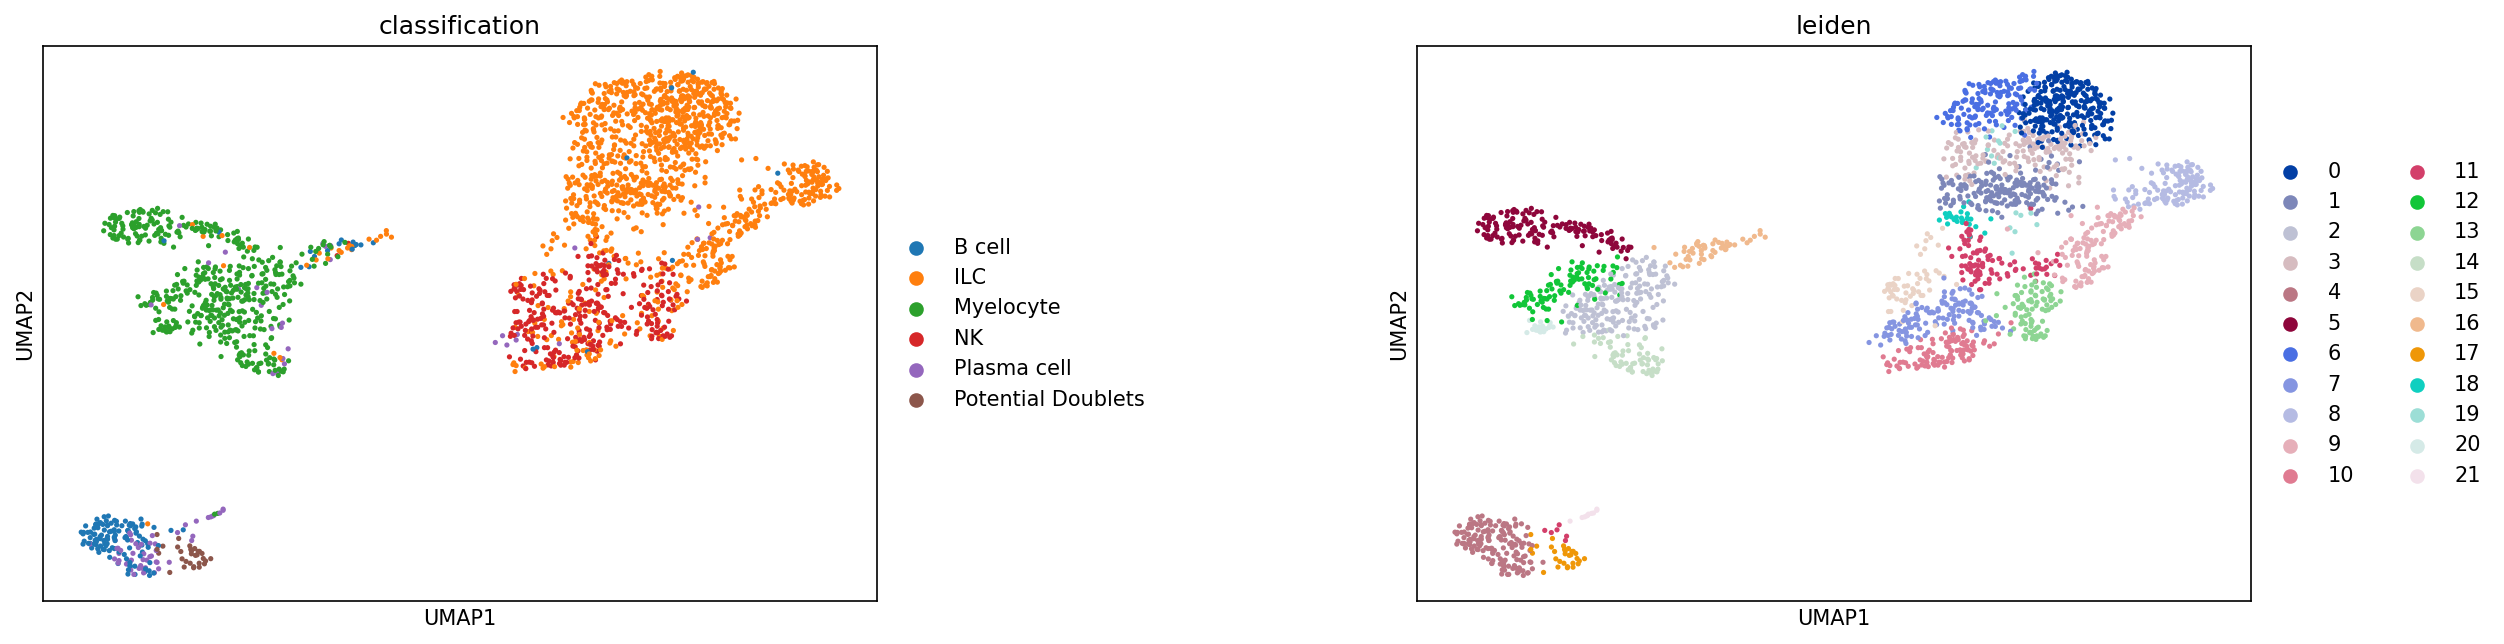

In [ ]:
sc.pl.umap(adata, color=['classification','leiden'], s=25, sort_order=False, wspace =.5)